# Praca domowa nr 8

Autor: Mikołaj Piórczyński  
Dane: https://www.kaggle.com/mohamedbakrey/housecsv

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

sns.set_style("ticks")


## Wprowadzenie
Niniejszy raport jest prezentacją wyników wstępnej eksploracyjnej analizy danych, wykonanej w ramach pracy domowej nr 8 z przedmiotu Techniki Wizualizacji Danych. Dane pochodzą ze strony https://www.kaggle.com/mohamedbakrey/housecsv. Przedstawiają informacje dotyczące ceny sprzedaży domów w Seattle w USA.

## Dane

In [2]:
# wczytanie danych 
df = pd.read_csv("houses.csv")

Ramka danych składa się z 1000 obserwacji i 18 zmiennych 

In [3]:
# wymiar ramki danych
df.shape 

(1000, 18)

In [4]:
# kilka pierwszych wierszy
df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,price
0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,3.0,7.0,1180.0,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,22.19
1,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,53.80
2,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3.0,6.0,770.0,0.0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,18.00
3,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,60.40
4,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,51.00


### Zmienne
* `bedrooms` - liczba sypialni
* `bathrooms` - liczba łazienek, gdzie 0.5 oznacza samą toaletę
* `sqft_living` - powierzchnia mieszkalna 
* `sqft_lot` - powierzchnia działki 
* `floors` - liczba pięter 
* `waterfront` - czy mieszkanie jest z widokiem na nadbrzeże czy nie
* `view` - wskaźnik od 0 do 4 oceniający jak dobry widok jest z posiadłości 
* `condition` - stan domu w skali od 1 do 5
* `grade` - ocena domu odnosząca się do jakości kostrukcji i projektu w skali od 1 do 13
* `sqft_above` - powierzchnia mieszkalna ponad poziomem gruntu 
* `sqft_basement` - powierzchnia mieszkalna ponieżej poziomu gruntu 
* `yr_built` - rok budowy 
* `yr_renovated` - rok ostatniego remontu
* `zipcode` - kod pocztowy
* `lat`	- szerokość geograficzna
* `long` - długość geograficzna
* `sqft_living15` - powierzchnia mieszkalna dla najbliższych 15 sąsiadów
* `price` - cena sprzedaży domu 


W naszym zbiorze danych jeden wiersz zawiera tylko brakujące dane, dlatego bez problemu usuwamy go.

In [5]:
df.loc[df['bedrooms'].isna()]

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,price
999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.dropna(axis=0, inplace=True)

Również znajduje się jeden dom, który nie zawiera ani sypialni ani łazienek. Wydaje się to podejrzane, dlatego pozbywamy się tego wiersza.

In [7]:
df.loc[df['bedrooms']==0, :]

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,price
875,0.0,0.0,3064.0,4764.0,3.5,0.0,2.0,3.0,7.0,3064.0,0.0,1990.0,0.0,98102.0,47.6362,-122.322,2360.0,110.0


In [8]:
df.drop(df.loc[df['bedrooms']==0].index, axis=0, inplace=True)

## Rozkłady zmiennych 

Zbadajmy jakie rozkłady mają wybrane zmienne.

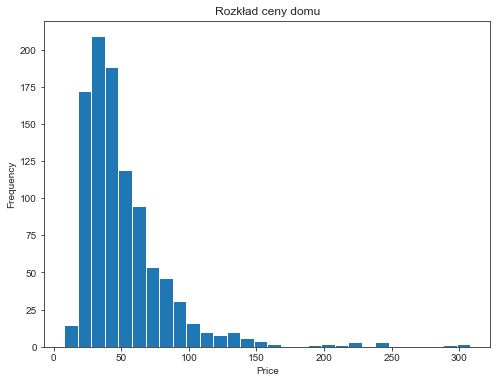

In [9]:
df['price'].plot.hist(bins=30, figsize=(8, 6));
plt.xlabel('Price');
plt.title('Rozkład ceny domu');

Widzimy, że rozkład ceny domów jest bardzo skośny, dlatego tworzymy dodatkową zmienną, będącą logarytmem ceny.

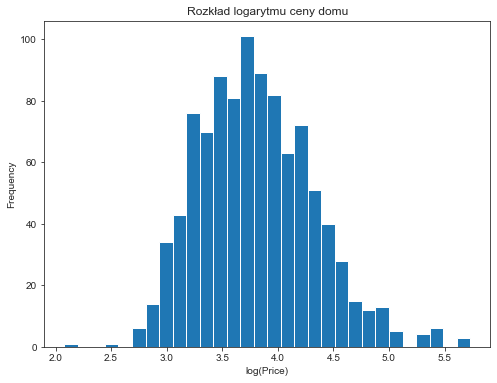

In [10]:
df['log_price'] = np.log(df['price'])

df['log_price'].plot.hist(bins=30, figsize=(8, 6))
plt.xlabel('log(Price)');
plt.title('Rozkład logarytmu ceny domu');

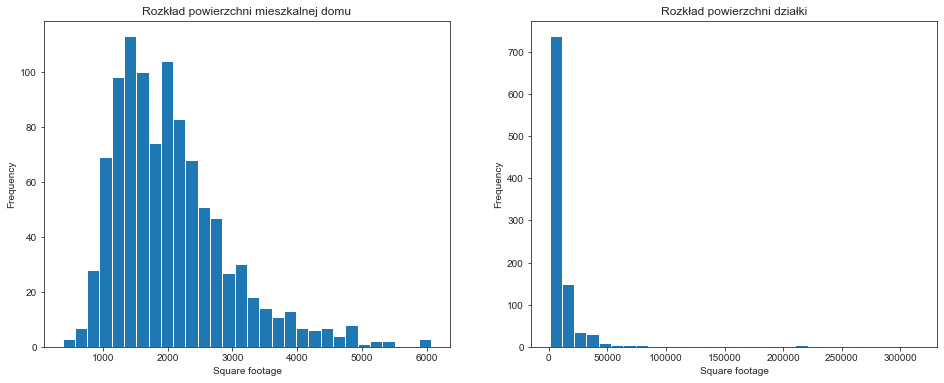

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
df['sqft_living'].plot.hist(bins=30, ax=ax1);
ax1.set_title('Rozkład powierzchni mieszkalnej domu');
ax1.set_xlabel('Square footage');

df['sqft_lot'].plot.hist(bins=30, ax=ax2);
ax2.set_title('Rozkład powierzchni działki');
ax2.set_xlabel('Square footage');

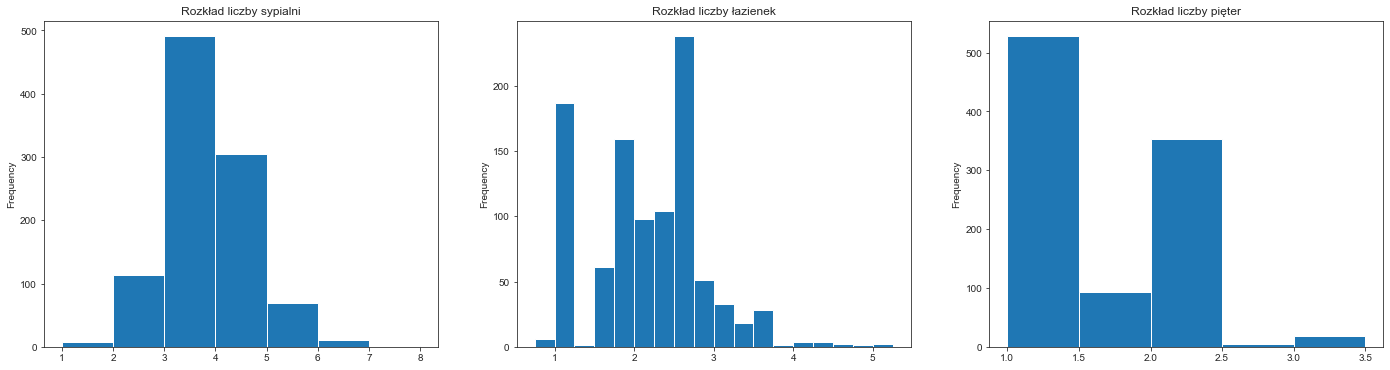

In [12]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 6))
df['bedrooms'].plot.hist(ax=ax1, bins=np.arange(min(df['bedrooms']), max(df['bedrooms']) + 2, 1));
ax1.set_title('Rozkład liczby sypialni');
df['bathrooms'].plot.hist(ax=ax2, bins=np.arange(min(df['bathrooms']), max(df['bathrooms']) + 0.5, 0.25));
ax2.set_title('Rozkład liczby łazienek');
df['floors'].plot.hist(ax=ax3, bins=np.arange(min(df['floors']), max(df['floors']) + 1, 0.5));
ax3.set_title('Rozkład liczby pięter');

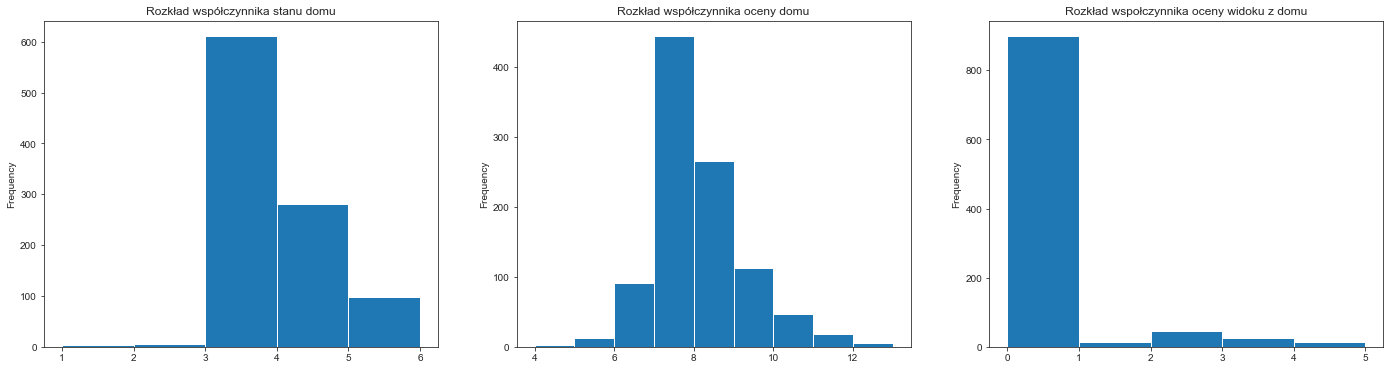

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 6))

df['condition'].plot.hist(ax=ax1, bins=np.arange(min(df['condition']), max(df['condition']) + 2, 1));
ax1.set_title('Rozkład współczynnika stanu domu');
df['grade'].plot.hist(ax=ax2, bins=np.arange(min(df['grade']), max(df['grade']) + 2, 1));  
ax2.set_title('Rozkład współczynnika oceny domu');
df['view'].plot.hist(ax=ax3, bins=np.arange(min(df['view']), max(df['view']) + 2, 1));
ax3.set_title('Rozkład wspołczynnika oceny widoku z domu');

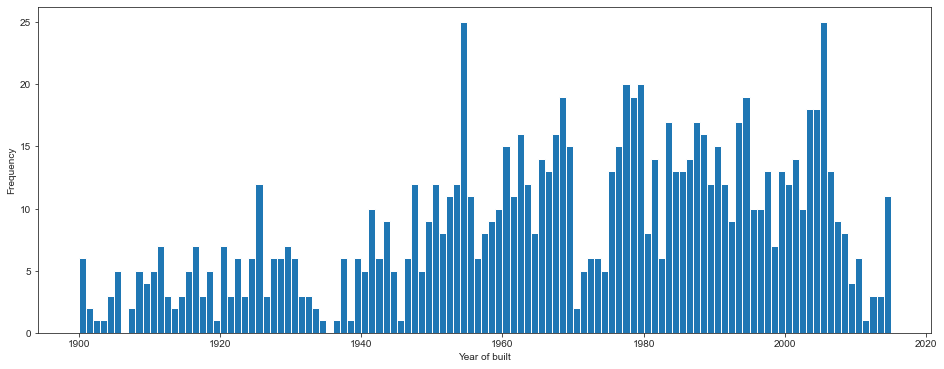

In [14]:
df['yr_built'].plot.hist(bins=115, figsize=(16, 6));
plt.xlabel('Year of built');

## Jak skorelowane są ze sobą zmienne?

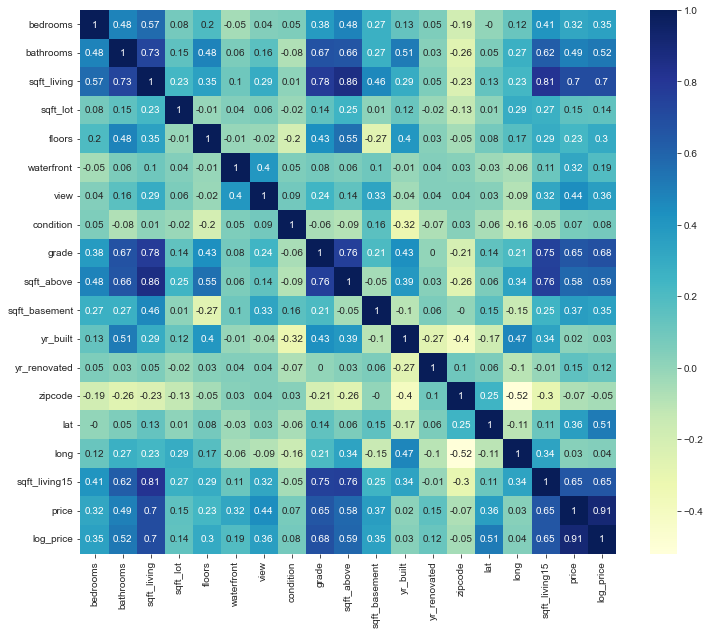

In [15]:
num_features = [name for name in df.columns if pd.api.types.is_numeric_dtype(df[name])]

plt.figure(figsize=(12, 10));
sns.heatmap(df[num_features].corr().round(2), annot=True, cmap="YlGnBu");

## Co wpływa na cenę domów?

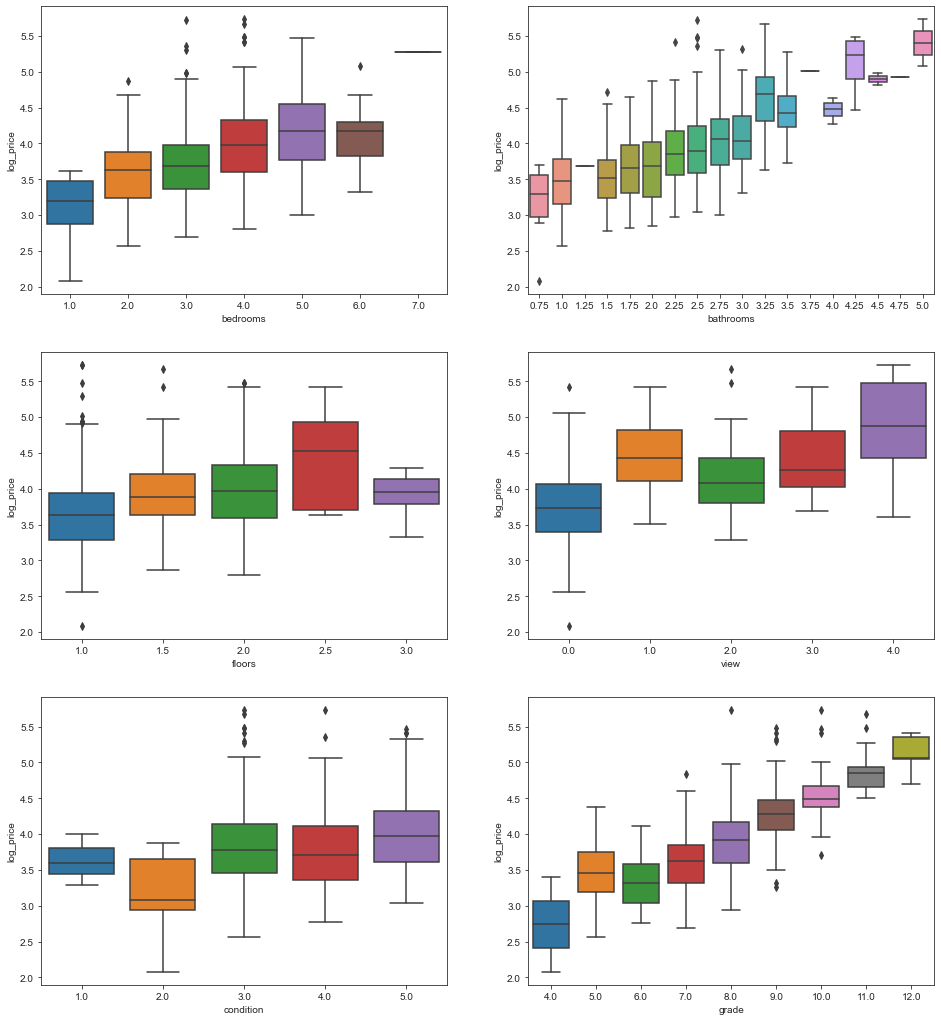

In [16]:
fig, axs = plt.subplots(3, 2, figsize=(16, 18))

sns.boxplot(data=df, x='bedrooms', y='log_price', ax=axs[0, 0]);
sns.boxplot(data=df, x='bathrooms', y='log_price', ax=axs[0, 1]);
sns.boxplot(data=df, x='floors', y='log_price', ax=axs[1, 0]);
sns.boxplot(data=df, x='view', y='log_price', ax=axs[1, 1]);
sns.boxplot(data=df, x='condition', y='log_price', ax=axs[2, 0]);
sns.boxplot(data=df, x='grade', y='log_price', ax=axs[2, 1]);


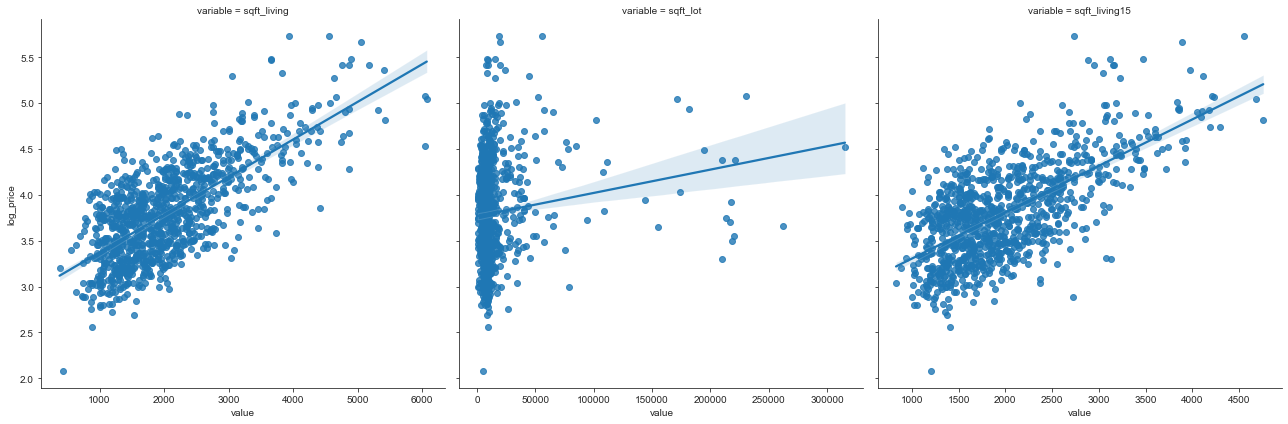

In [17]:
g = sns.lmplot(
    data=pd.melt(df, id_vars=['log_price'], value_vars=['sqft_living', 'sqft_lot', 'sqft_living15']), 
    x='value',
    y='log_price',
    col='variable',
    sharex=False,
    height=6
);


## Jak rok budowy wpływa na inne cechy? 

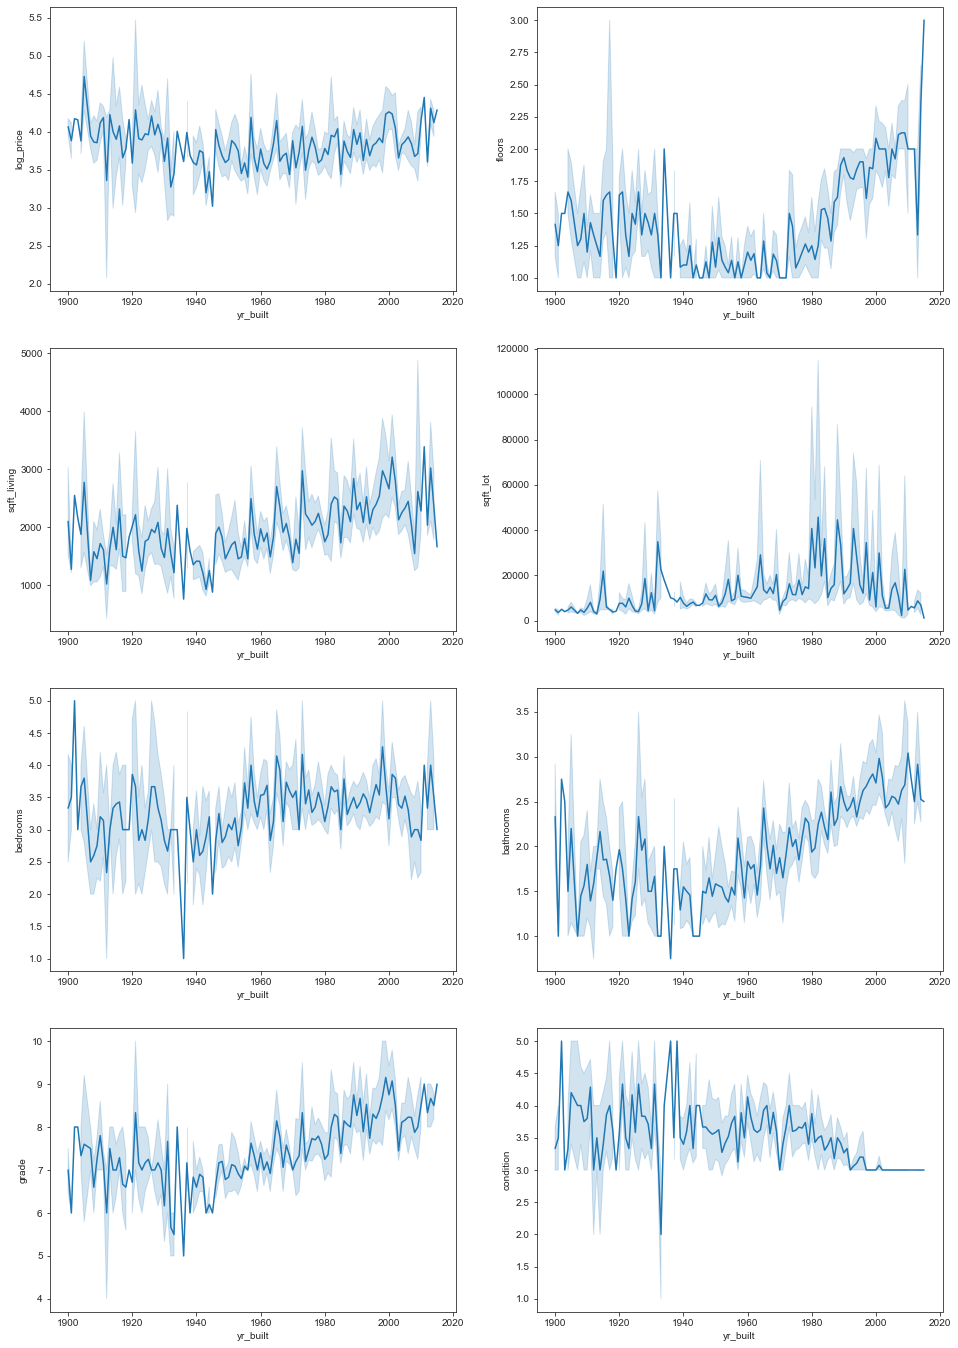

In [18]:
fig, axs = plt.subplots(4, 2, figsize=(16, 24))

sns.lineplot(data=df, x='yr_built', y='log_price', ax=axs[0, 0]);
sns.lineplot(data=df, x='yr_built', y='floors', ax=axs[0, 1]);
sns.lineplot(data=df, x='yr_built', y='sqft_living', ax=axs[1, 0]);
sns.lineplot(data=df, x='yr_built', y='sqft_lot', ax=axs[1, 1]);
sns.lineplot(data=df, x='yr_built', y='bedrooms', ax=axs[2, 0]);
sns.lineplot(data=df, x='yr_built', y='bathrooms', ax=axs[2, 1]);
sns.lineplot(data=df, x='yr_built', y='grade', ax=axs[3, 0]);
sns.lineplot(data=df, x='yr_built', y='condition', ax=axs[3, 1]);


## Co wpływa na oceną domu?

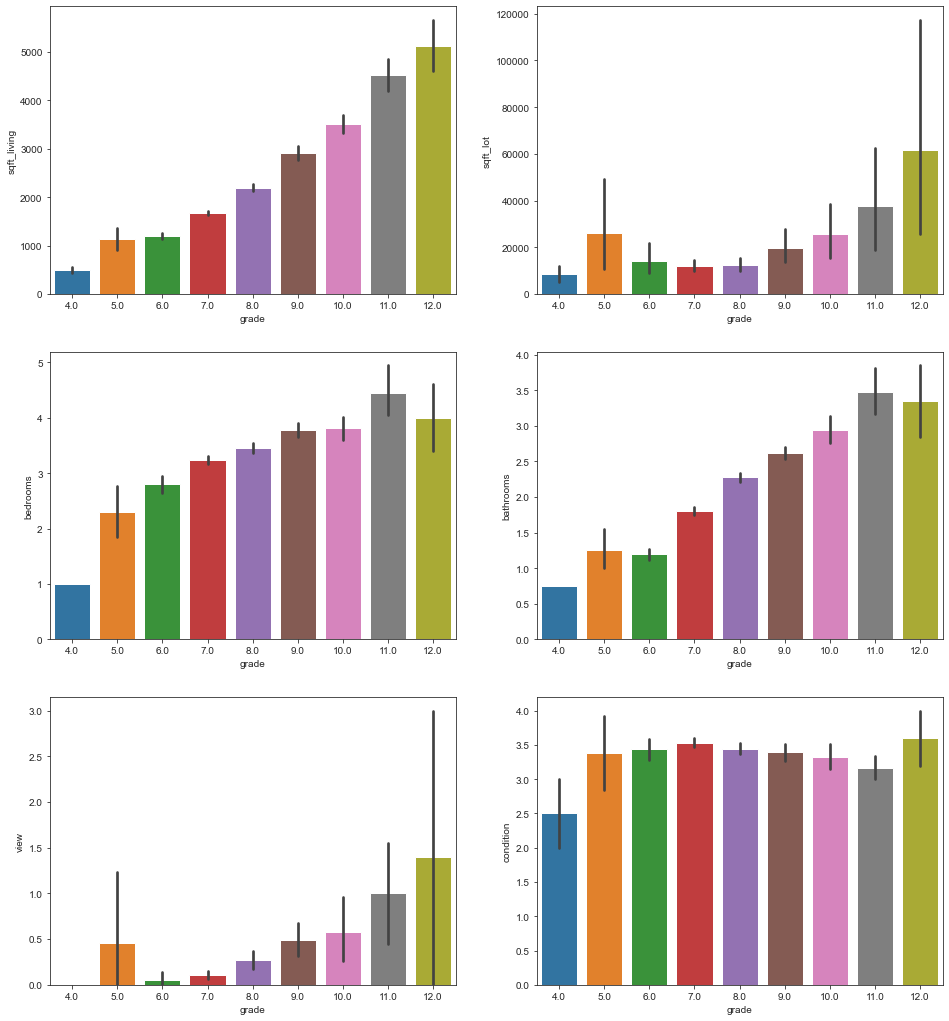

In [19]:
fig, axs = plt.subplots(3, 2, figsize=(16, 18))

sns.barplot(data=df, x='grade', y='sqft_living', ax=axs[0, 0]);
sns.barplot(data=df, x='grade', y='sqft_lot', ax=axs[0, 1]);
sns.barplot(data=df, x='grade', y='bedrooms', ax=axs[1, 0]);
sns.barplot(data=df, x='grade', y='bathrooms', ax=axs[1, 1]);
sns.barplot(data=df, x='grade', y='view', ax=axs[2, 0]);
sns.barplot(data=df, x='grade', y='condition', ax=axs[2, 1]);

## Wnioski

Na podastawie wykonanej analizy zostały wyciągnięte następujące wnioski. 

Znaczna większość domów to domy "tańsze niż droższe", o czym świadczy skośność rozkładu ceny. Śrdenia wartość domów to ok. 25 tys. \$. Posiadłości o wartości powyżej 200 tys. \$ to rzadkość. Typowy dom ma 3 sypialnie, 2 łazienki i jedną toaletę oraz 1 piętro, to wszystko na powierzchni mieszkalnej wynoszącej ok. 140 m^2 (1500 ft^2). Stan większości domów został oceniony na 3 w 5 stopniowej skali, natomiast ocena ich konstrukcji na 7 w 13 stopniowej skali. Warto zwrócić uwagę na brak domów z oceną mniejszą niż 4. Większość domów ma słaby widok z okien - typowa wartośc to 0 w 4 stopniowej skali. 

Ciężko uchwycić jakikolwiek trend w ilości budowanych domów na przestrzeni lat, jedyne co da się zauważyć to, to że znaczna większośc domów została wybudowana po wojnie, najwięcej w 1954 i 2005 roku. Rok budowy domu, nie wpływa na jego cenę ("domy to nie wina, że im starsze tym droższe"), natomiast wpływa na jego ocenę. Warte zauważenia jest to, że w czasie wojny i tuż po niej budowano głównie niskie budynki, jednak od lat 60' zaczęto budować coraz to wyższe domy o coraz większej powierzchnii mieszkalnej. Również wraz z biegiem lat budowane domy zaczęły mieć coraz więcej łazienek. 

Na cenę domów najbardziej wpływa powierzchnia mieszkalna domu (wprost proporcjonalnie do logarytmu) oraz średnia powierzchnia mieszkalna 15 najbliższych sąsiadów, choć warte jest uwagi, że zmienne te są silnie zależne, tzn. jeśli "nasz" dom ma dużą powierzchnię, to znaczy, że domy naszych sąsiadów prawdopodobnie również mają dużą powierzchnię. Na cenę również duży wpływ mają liczba sypialni, liczba łazienek (silnie zależna od powierzchni mieszkalnej) oraz widok z okien. Natomiast nie widać znaczącej zależności pomiędzy ceną a kondycją domu, powierzchnią działki na której jest on wybudowany oraz rokiem jego budowy. Warte uwagi jest jednak zaznaczenie, że najdroższe domy nie osiągały najwyższych wartości w każdej z wymienionych cech. 

Ocena domów jest proporcjonalna do: liczby łazienek (silna korelacja), sypialni (w mniejszym stopniu), powierzchnii mieszkalnej (silna korelacja), powierzchnii działki oraz widoku z okien, natomiast kondycja domu nie gra roli. 
